We need to know the relationship between L(theta) and theta.
Therefore we drew the following graphs.

In [97]:
def L(theta_value=0.12, s=5):
    X = 10
    h = 2
    p = 8
    K = 10
    c = 0
     
    demand = np.random.exponential(theta_value, 10000)
    
    for i in range(10000):
        if(demand[i] <= X - s):
            c += h * (X - demand[i])
            X -= demand[i]
        elif(demand[i] > X - s and demand[i] <= X):
            c += h * (X - demand[i]) + K
            X = 10
        else:
            c += p * (demand[i] - X) + K
            X = 10
    
    return c / 10000

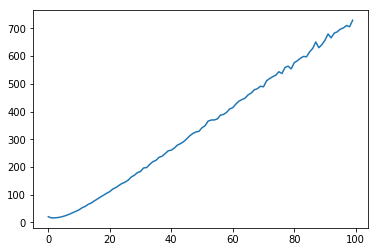

In [98]:
import numpy as np
import matplotlib.pyplot as plt

theta = np.arange(100)
l = []

for i in range(100):
    l.append(L(theta_value=theta[i]))

plt.plot(theta,np.array(l))
plt.show()

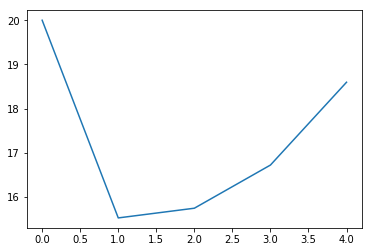

In [99]:
import numpy as np
import matplotlib.pyplot as plt

theta = np.arange(5)
l = []
for i in range(5):
    l.append(L(theta_value=theta[i]))

plt.plot(theta,np.array(l))
plt.show()

Since we don't know a exact function L(theta), we try to use the sign of the derivative of L(theta).

In [56]:
import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt

def cost_function(theta_value):
    X = 10
    s = 5
    h = 2
    p = 8
    K = 10
    c = 0
    
    if(theta_value <= 0):
        theta_value = 0.00001
    
    demand = np.random.exponential(1 / theta_value, 100000)
    
    for i in range(100000):
        if(demand[i] <= X - s):
            c += h * (X - demand[i])
            X -= demand[i]
        elif(demand[i] > X - s and demand[i] <= X):
            c += h * (X - demand[i]) + K
            X = 10
        else:
            c += p * (demand[i] - X) + K
            X = 10
    return 0.5 * (c / 100000 - 37)**2

def gradient(theta_value, c):
    X = 10
    s = 5
    h = 2
    p = 8
    K = 10
    c = 0
    
    demand = np.random.exponential(1 / theta_value, 100000)
    
    for i in range(100000):
        if(demand[i] <= X - s):
            c += h * (X - demand[i])
            X -= demand[i]
        elif(demand[i] > X - s and demand[i] <= X):
            c += h * (X - demand[i]) + K
            X = 10
        else:
            c += p * (demand[i] - X) + K
            X = 10
    
    return (c / 100000 - 37) * (theta_value - 1.0)

# m = number of iterations
# ep = epsilon fixed step size
    
def stochasticapproximation(th0, m, ep):
    theta = np.zeros(m)
    cf = np.zeros(m)
        
    theta[0] = th0
    for i in range(m-1):
        cf[i]= cost_function(theta[i])
        
        # gradient descent       
        theta[i+1] = max(0.00001, (theta[i] - ep * gradient(theta[i], cf[i]) / (i + 1)**1.2))
    
    cf[m-1]= cost_function(theta[m-1])
    
    plt.plot(np.arange(m),theta)
    plt.legend(['theta']) 
    plt.show()

    plt.plot(np.arange(m),cf)
    plt.legend(['cost function']) 
    plt.show()


    print("Final values  theta & cost", theta[m-1], cost_function(theta[m-1]))    
    
    return theta

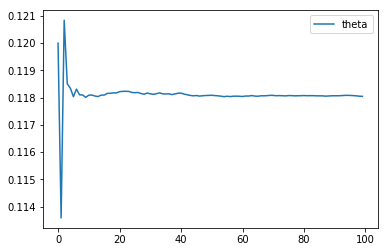

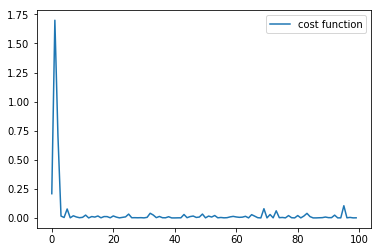

Final values  theta & cost 0.11804579200683361 0.004514383353024013


In [57]:
def main():
    th0= 0.12
    m  = 100 # iterations
    ep = 0.01
    
    stochasticapproximation(th0, m, ep)
    
if __name__ == '__main__':
    main()

We first have a look at L(s).

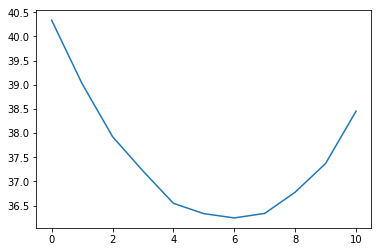

In [26]:
import numpy as np
import matplotlib.pyplot as plt

s = np.arange(0, 11)
l = []

for i in range(0, 11):     #Since S=10 and the empty inventory is 0, we set [0, 10] as boundary.
    total = 0
    for j in range(1000):    #Since the influence of the noise is too profound, we run 1000 times to diversify it.
        total += L(s=s[i])
    l.append(total / 1000)

plt.plot(s,np.array(l))
plt.show()

In [2]:
import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt

def L(theta_value=0.12, s=5):
    X = 10
    h = 2
    p = 8
    K = 10
    c = 0
    
    demand = np.random.exponential(1 / theta_value, 100000)
    
    for i in range(100000):
        if(demand[i] <= X - s):
            c += h * (X - demand[i])
            X -= demand[i]
        elif(demand[i] > X - s and demand[i] <= X):
            c += h * (X - demand[i]) + K
            X = 10
        else:
            c += p * (demand[i] - X) + K
            X = 10
    
    return c / 100000

def gradient(s):
    X = 10
    theta_value = 0.12
    h = 2
    p = 8
    K = 10
    c = 0
    
    demand = np.random.exponential(1 / theta_value, 100000)
    
    for i in range(100000):
        if(demand[i] <= X - s):
            c += h * (X - demand[i])
            X -= demand[i]
        elif(demand[i] > X - s and demand[i] <= X):
            c += h * (X - demand[i]) + K
            X = 10
        else:
            c += p * (demand[i] - X) + K
            X = 10
    
    if((s < 4 and s >= 0) or (s < 7 and s >= 6)):
        return -1
    elif((s > 4 and s < 6) or (s > 7 and s <= 10)):
        return 1
    else:
        return 0

# m = number of iterations
# ep = epsilon fixed step size
    
def stochasticapproximation(s0, m, ep, eta):
    s = np.zeros(m)
    cf = np.zeros(m)
        
    s[0] = s0
    for i in range(m-1):
        cf[i]= L(s=s[i])
        
        # gradient descent       
        s[i+1] = min(10, max(0, s[i] - ep * gradient(s[i]) / (i + 1)))
    
    cf[m-1]= L(s=s[m-1])
    
    plt.plot(np.arange(m),s)
    plt.legend(['s']) 
    plt.show()

    plt.plot(np.arange(m),cf)
    plt.legend(['L']) 
    plt.show()


    print("Final values  s & L", s[m-1], L(s=s[m-1]))    
    
    return s

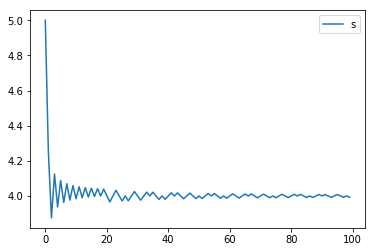

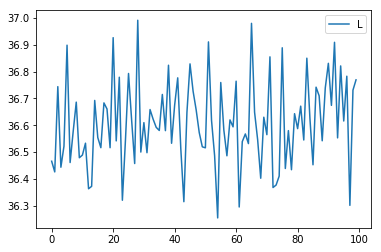

Final values  s & L 3.9924273513987547 36.67924620890286


In [7]:
def main():
    s0 = 5
    m  = 100 # iterations
    ep = 0.75
    eta = 1.0
    
    stochasticapproximation(s0, m, ep, eta)
    
if __name__ == '__main__':
    main()

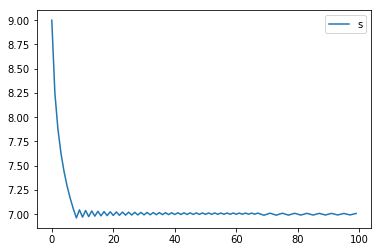

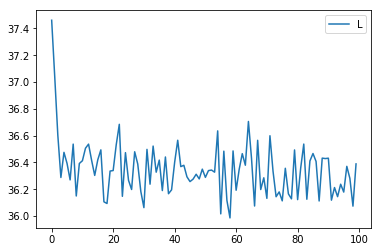

Final values  s & L 7.007557755611706 36.40429308531636


In [9]:
def main():
    s0 = 9
    m  = 100 # iterations
    ep = 0.75
    eta = 1.0
    
    stochasticapproximation(s0, m, ep, eta)
    
if __name__ == '__main__':
    main()

In [31]:
import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt

def L(theta_value=0.12, s=5):
    X = 10
    h = 2
    p = 8
    K = 10
    c = 0
    
    demand = np.random.exponential(1 / theta_value, 1000)
    
    for i in range(1000):
        if(demand[i] <= X - s):
            c += h * (X - demand[i])
            X -= demand[i]
        elif(demand[i] > X - s and demand[i] <= X):
            c += h * (X - demand[i]) + K
            X = 10
        else:
            c += p * (demand[i] - X) + K
            X = 10
    
    return c / 1000

# m = number of iterations
# ep = epsilon fixed step size
    
def stochasticapproximation(s0, m, ep, eta):
    s = np.zeros(m)
    cf = np.zeros(m)
        
    s[0] = s0
    for i in range(m-1):
        cf[i]= L(s=s[i])
        #total = 0
        #for j in range(100):
        #    total += L(s=s[i])
        #cf[i]= total / 100

        # FD descent
        #etai = (eta / (2 * (i + 1)))**2.0
        #etai = eta / (2 * (i + 1))
        etai = eta    #The influence of the noise is too profound. We tried many eta, and finally decide to use a constant. 
        total = 0
        for j in range(100):    #Since the influence of the noise is too profound, we run 100 times to diversify it.
            total += L(s=s[j]+etai)
        cost_plus = total / 100
        
        total = 0
        for j in range(100):
            total += L(s=s[j]-etai)
        cost_minus = total / 100
        cost_diff = (cost_plus - cost_minus) / (2.0 * etai)
        s[i+1] = min(10, max(0, s[i] - ep * cost_diff / (i + 1)))
    
    #cf[m-1]= L(s=s[m-1])
    total = 0
    for j in range(100):
        total += L(s=s[m-1])
    cf[m-1] = total / 100
    
    plt.plot(np.arange(m),s)
    plt.legend(['s']) 
    plt.show()

    plt.plot(np.arange(m),cf)
    plt.legend(['L']) 
    plt.show()


    print("Final values  s & L", s[m-1], L(s=s[m-1]))    
    
    return s

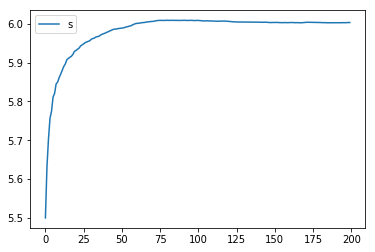

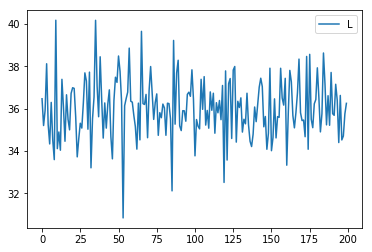

Final values  s & L 6.002983655573266 36.55928413013442


In [32]:
def main():
    s0 = 5.5
    m  = 200 # iterations
    ep = 0.075
    eta = 0.25
    
    stochasticapproximation(s0, m, ep, eta)
    
if __name__ == '__main__':
    main()

Below is bad code, ignore it.

In [45]:
import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt

def L(S, theta_value=0.12, s=5):
    X = S
    h = 2
    p = 8
    K = 10
    c = 0
    
    demand = np.random.exponential(1 / theta_value, 1000)
    
    for i in range(1000):
        if(demand[i] <= X - s):
            c += h * (X - demand[i])
            X -= demand[i]
        elif(demand[i] > X - s and demand[i] <= X):
            c += h * (X - demand[i]) + K
            X = S
        else:
            c += p * (demand[i] - X) + K
            X = S
    
    return c / 1000

# m = number of iterations
# ep = epsilon fixed step size
    
def stochasticapproximation(s0, S0, m, ep, eta):
    s = np.zeros(m)
    S = np.zeros(m)
    cf = np.zeros(m)
        
    s[0] = s0
    S[0] = S0
    for i in range(m-1):
        cf[i]= L(s=s[i], S=S[i])
        #total = 0
        #for j in range(100):
        #    total += L(s=s[i])
        #cf[i]= total / 100

        # FD descent
        #etai = (eta / (2 * (i + 1)))**2.0
        #etai = eta / (2 * (i + 1))
        etai1 = eta    #The influence of the noise is too profound. We tried many eta, and finally decide to use a constant.
        etai2 = eta
        total = 0
        for j in range(100):    #Since the influence of the noise is too profound, we run 100 times to diversify it.
            total += L(s=s[j]+etai1, S=S[j]+etai2)
        cost_plus = total / 100
        
        total = 0
        for j in range(100):
            total += L(s=s[j]-etai1, S=S[j]-etai2)
        cost_minus = total / 100
        cost_diff = (cost_plus - cost_minus) / (2.0 * etai1)
        s[i+1] = s[i] - ep * cost_diff / (i + 1)
        S[i+1] = S[i] - ep * cost_diff / (i + 1)
    
    #cf[m-1]= L(s=s[m-1])
    total = 0
    for j in range(100):
        total += L(s=s[m-1], S=S[m-1])
    cf[m-1] = total / 100
    
    plt.plot(np.arange(m),s)
    plt.legend(['s']) 
    plt.show()
    
    plt.plot(np.arange(m),S)
    plt.legend(['S']) 
    plt.show()

    plt.plot(np.arange(m),cf)
    plt.legend(['L']) 
    plt.show()


    print("Final values  s, S & L", s[m-1], S[m-1], L(s=s[m-1], S=S[m-1]))    
    
    return

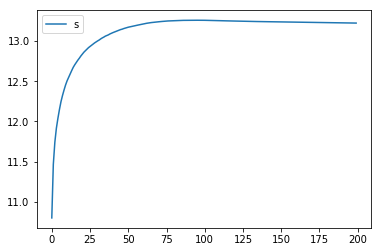

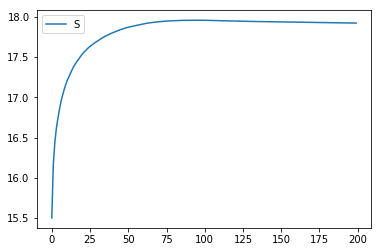

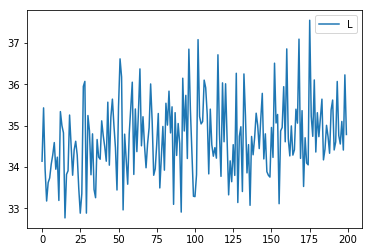

Final values  s, S & L 13.22390881581483 17.92390881581484 35.98827341641985


In [47]:
def main():
    s0 = 10.8
    S0 = 15.5
    m  = 200 # iterations
    ep = 0.075
    eta = 0.25
    
    stochasticapproximation(s0, S0, m, ep, eta)
    
if __name__ == '__main__':
    main()